In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
# read data into pandas df
studs = pd.read_csv('study_performance.csv')

In [3]:
# view the first 5 rows of data 
studs.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
# check the data type of features 
studs.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [10]:
# print summary statistics of continuous variables 
studs.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
# count the number of students that have used a test preparation course 
studs.test_preparation_course.value_counts()

none         642
completed    358
Name: test_preparation_course, dtype: int64

In [11]:
# count the number of values for parental education levels 
studs.parental_level_of_education.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

<BarContainer object of 6 artists>

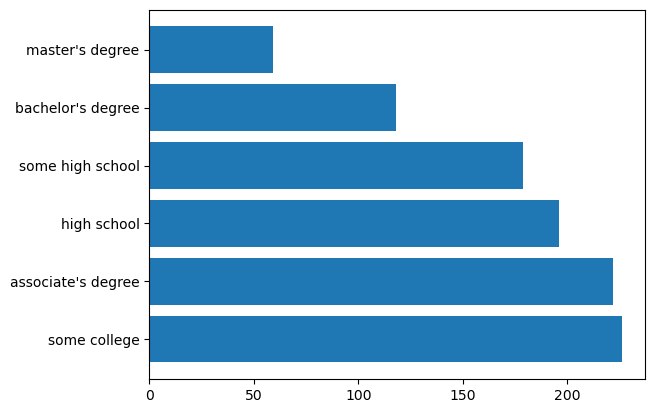

In [190]:
# plot the relative counts of parental education levels
plt.barh(studs['parental_level_of_education'].value_counts().index, studs['parental_level_of_education'].value_counts().values)

## Target Feature Analysis

<Axes: >

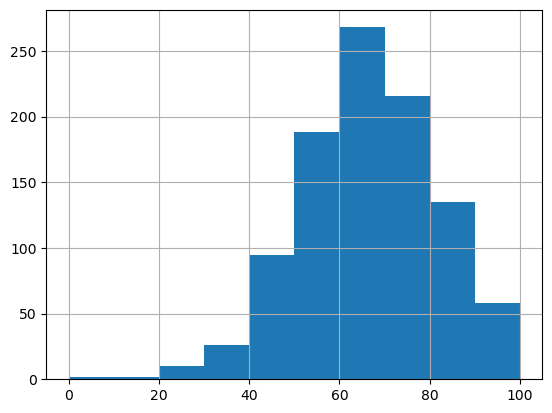

In [14]:
# create a histogram of math scores
studs.math_score.hist()

<Axes: >

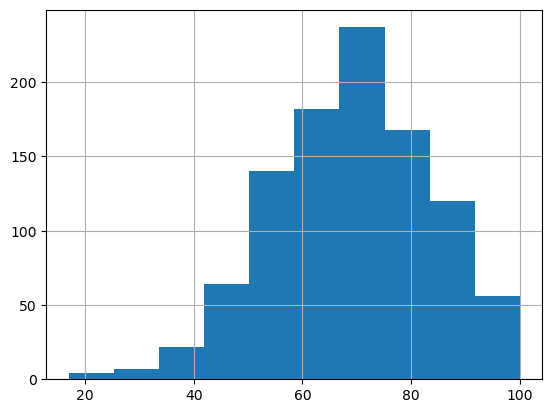

In [15]:
# create a histogram of reading scores
studs.reading_score.hist()

<Axes: >

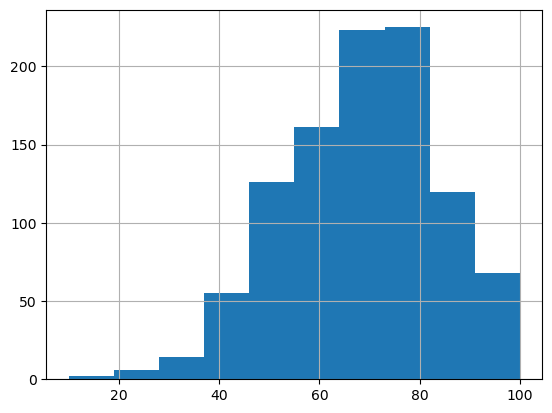

In [16]:
# create a histogram of writing scores
studs.writing_score.hist()

In [23]:
# one hot encode the data to use categorical variables as features 
one_hot = pd.get_dummies(studs)
one_hot

,math_score,reading_score,writing_score,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,62,55,55,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,59,71,65,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,68,78,77,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [24]:
# create a correlation matrix 
one_hot.corr()

,math_score,reading_score,writing_score,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
math_score,1.000000,0.817580,0.802642,-0.167982,0.167982,-0.091977,-0.084250,-0.073387,0.050071,0.205855,0.063228,0.079664,-0.128725,0.060417,0.037056,-0.079852,-0.350877,0.350877,0.177702,-0.177702
reading_score,0.817580,1.000000,0.954598,0.244313,-0.244313,-0.096274,-0.060283,-0.003074,0.035177,0.106712,0.064386,0.096024,-0.151068,0.106452,0.010782,-0.071369,-0.229560,0.229560,0.241780,-0.241780
writing_score,0.802642,0.954598,1.000000,0.301225,-0.301225,-0.110714,-0.078254,-0.010203,0.082032,0.089077,0.064799,0.128297,-0.182211,0.125693,0.027989,-0.097326,-0.245769,0.245769,0.312946,-0.312946
gender_female,-0.167982,0.244313,0.301225,1.000000,-1.000000,-0.071001,0.028466,0.063368,-0.030566,-0.020302,0.004835,0.011638,-0.037952,0.046188,0.004460,-0.008990,0.021372,-0.021372,-0.006028,0.006028
gender_male,0.167982,-0.244313,-0.301225,-1.000000,1.000000,0.071001,-0.028466,-0.063368,0.030566,0.020302,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,0.008990,-0.021372,0.021372,0.006028,-0.006028
race_ethnicity_group A,-0.091977,-0.096274,-0.110714,-0.071001,0.071001,1.000000,-0.151381,-0.213923,-0.186234,-0.126110,-0.048658,0.016307,0.004919,-0.033551,-0.017751,0.073921,0.032329,-0.032329,-0.006315,0.006315
race_ethnicity_group B,-0.084250,-0.060283,-0.078254,0.028466,-0.028466,-0.151381,1.000000,-0.331479,-0.288574,-0.195411,-0.007238,-0.019121,0.069093,-0.056363,-0.036203,0.026531,0.008257,-0.008257,-0.000106,0.000106
race_ethnicity_group C,-0.073387,-0.003074,-0.010203,0.063368,-0.063368,-0.213923,-0.331479,1.000000,-0.407797,-0.276145,0.037077,0.015682,0.007977,0.001630,-0.015872,-0.045339,0.003385,-0.003385,0.012522,-0.012522
race_ethnicity_group D,0.050071,0.035177,0.082032,-0.030566,0.030566,-0.186234,-0.288574,-0.407797,1.000000,-0.240402,-0.044674,-0.020556,-0.042118,0.072793,0.042347,0.018402,0.009458,-0.009458,-0.055956,0.055956
race_ethnicity_group E,0.205855,0.106712,0.089077,-0.020302,0.020302,-0.126110,-0.195411,-0.276145,-0.240402,1.000000,0.054922,0.013221,-0.039494,-0.003180,0.023153,-0.053075,-0.052398,0.052398,0.059393,-0.059393


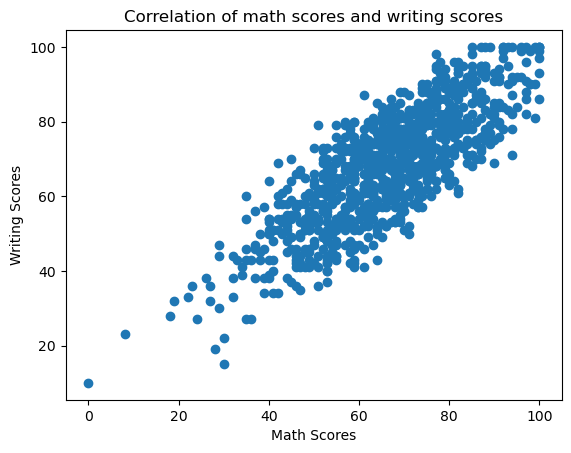

In [198]:
# plot test score corrleations
plt.scatter(studs.math_score,studs.writing_score)
plt.xlabel("Math Scores")
plt.ylabel("Writing Scores")
plt.title("Correlation of math scores and writing scores")
plt.show()

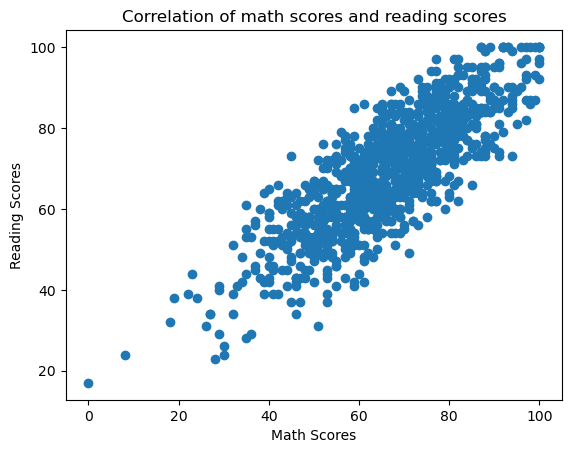

In [194]:
# plot test score corrleations
plt.scatter(studs.math_score,studs.reading_score)
plt.xlabel("Math Scores")
plt.ylabel("Reading Scores")
plt.title("Correlation of math scores and reading scores")
plt.show()

## Standardize Features

In [131]:
# create scaler 
scaler= StandardScaler()

In [ ]:
# assign standarized features to a new variable 
feature_stand = scaler.fit_transform(feature)

## Feature Reduction 

In [41]:
# assign model targets and features
target = one_hot['math_score']
feature =  one_hot[one_hot.columns.drop('math_score')]

In [164]:
# create linear regression
model = LinearRegression()

In [165]:
# use recursive elimination to select features 
rfecv = RFECV(estimator=model, step=1, scoring='neg_mean_squared_error', min_features_to_select=1)

rfecv.fit(feature, target)
rfecv.transform(feature)

In [58]:
# determine the ideal number of features 
rfecv.n_features_

19

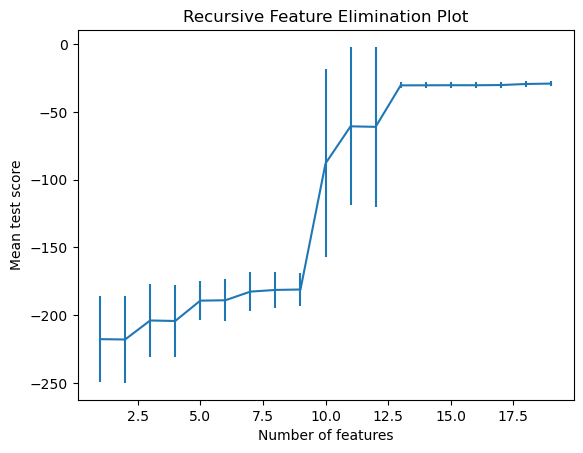

In [200]:
# plot the results of adding features to the model 
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()

plt.errorbar(range(1, n_scores + 1), rfecv.cv_results_["mean_test_score"], yerr=rfecv.cv_results_["std_test_score"])

plt.xlabel("Number of features")
plt.ylabel("Mean test score")
plt.title("Recursive Feature Elimination Plot")
plt.show()

## Modeling 

In [205]:
X = np.asarray(one_hot['writing_score']).reshape(-1,1)
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

predictions = multi_model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.6315729848280731
The rmse is:  9.188065203458686


### Mulitple Linear Regression 

In [70]:
# build a multiple linear regression model 
X = feature
y = target 

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

predictions = multi_model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

# calculate the r squared and root mean square error of the model
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8666041004680116
The rmse is:  5.494602293489262


In [92]:
# print the coefficient of each feature 
for x in range(0, len(feature.columns)):
    print(feature.columns[x], multi_model.coef_[x])

reading_score 0.26351342083433776
writing_score 0.7015637871161692
gender_female -6.620226235432001
gender_male 6.6202262354319945
race_ethnicity_group A -1.237936921083585
race_ethnicity_group B -0.4025708745263768
race_ethnicity_group C -1.059711187005412
race_ethnicity_group D -1.13954032233379
race_ethnicity_group E 3.8397593049491614
parental_level_of_education_associate's degree 0.23046928419733836
parental_level_of_education_bachelor's degree -0.8164279316717774
parental_level_of_education_high school 0.7981985244242196
parental_level_of_education_master's degree -1.625602528001603
parental_level_of_education_some college 0.6307317111783693
parental_level_of_education_some high school 0.7826309398734526
lunch_free/reduced -1.6063552464316062
lunch_standard 1.6063552464316058
test_preparation_course_completed -1.7511338291029503
test_preparation_course_none 1.7511338291029406


### Fit a nonlinear relationship

In [118]:
# build a polynomial model with x^2
polynomial = PolynomialFeatures(degree=2, include_bias=False)
featurespolynomial = polynomial.fit_transform(feature)

X = featurespolynomial
y = target 

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

multi_model = LinearRegression()
model = multi_model.fit(X_train, y_train)

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8114261606699767
The rmse is:  6.56902438107776


In [120]:
# build a polynomial model with x^3
polynomial = PolynomialFeatures(degree=3, include_bias=False)
featurespolynomial = polynomial.fit_transform(feature)

X = featurespolynomial
y = target 

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

multi_model = LinearRegression()
model = multi_model.fit(X_train, y_train)

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  -62302942842545.42
The rmse is:  121536922.50262731


### Ridge Regression 

In [151]:
# use cross validation to calculate an ideal alpha value 
regr_cv = RidgeCV(alphas=[0.1,1.0, 1.2, 1.3, 1.4, 3.0])
model_cv = regr_cv.fit(feature_stand, target)

In [152]:
# print the ideal alha value for ridge regression 
model_cv.alpha_

1.3

In [207]:
# build a ridge regression model with calculated alpha 
X = feature_stand
y = target 

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

regression = Ridge(alpha=1.3)
model = regression.fit(feature_stand, target)

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

# calculate r squared and root mean square error of the model
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8763297594593973
The rmse is:  5.285864560887704


In [163]:
# print the coeffecients of model features 
for x in range(0, len(feature.columns)):
    print(feature.columns[x], model_cv.coef_[x])

reading_score 3.9663358729263836
writing_score 10.509068766967616
gender_female -3.298572849032812
gender_male 3.298572849032812
race_ethnicity_group A -0.29809267145667917
race_ethnicity_group B -0.08355333225486561
race_ethnicity_group C -0.40373155710704367
race_ethnicity_group D -0.407369410449121
race_ethnicity_group E 1.3976386340622327
parental_level_of_education_associate's degree -0.013411508857672061
parental_level_of_education_bachelor's degree -0.34282404234632224
parental_level_of_education_high school 0.20630306813575672
parental_level_of_education_master's degree -0.4411124541489784
parental_level_of_education_some college 0.15441096532991594
parental_level_of_education_some high school 0.19207391211897118
lunch_free/reduced -0.772821806534914
lunch_standard 0.772821806534914
test_preparation_course_completed -0.8302950126547017
test_preparation_course_none 0.8302950126547017


In [206]:
from sklearn.feature_selection import f_regression

In [208]:
f_statistic, p_values = f_regression(X, y)

In [209]:
f_statistic

array([2.01198156e+03, 1.80721667e+03, 2.89793361e+01, 2.89793361e+01,
       8.51490159e+00, 7.13451779e+00, 5.40396562e+00, 2.50835083e+00,
       4.41628041e+01, 4.00582015e+00, 6.37404324e+00, 1.68156921e+01,
       3.65623668e+00, 1.37230874e+00, 6.40440608e+00, 1.40118842e+02,
       1.40118842e+02, 3.25426485e+01, 3.25426485e+01])

In [210]:
p_values

array([1.78775311e-241, 3.37602704e-226, 9.12018555e-008, 9.12018555e-008,
       3.60151712e-003, 7.68444284e-003, 2.02909329e-002, 1.13561198e-001,
       4.96229401e-011, 4.56137807e-002, 1.17342014e-002, 4.45432565e-005,
       5.61457485e-002, 2.41695206e-001, 1.15364775e-002, 2.41319560e-030,
       2.41319560e-030, 1.53591346e-008, 1.53591346e-008])

In [211]:
for x in range(0, len(feature.columns)):
    print(feature.columns[x], model_cv.coef_[x], f_statistic[x],p_values[x])

reading_score 3.9663358729263836 2011.981555312104 1.7877531098927278e-241
writing_score 10.509068766967616 1807.2166657826942 3.3760270425458192e-226
gender_female -3.298572849032812 28.97933609503111 9.12018554933112e-08
gender_male 3.298572849032812 28.97933609503111 9.12018554933112e-08
race_ethnicity_group A -0.29809267145667917 8.514901585538928 0.0036015171249518794
race_ethnicity_group B -0.08355333225486561 7.134517789068466 0.007684442839268314
race_ethnicity_group C -0.40373155710704367 5.4039656242276095 0.020290932900978286
race_ethnicity_group D -0.407369410449121 2.508350825622873 0.11356119810525196
race_ethnicity_group E 1.3976386340622327 44.16280405596806 4.9622940097814446e-11
parental_level_of_education_associate's degree -0.013411508857672061 4.005820152003389 0.04561378068806519
parental_level_of_education_bachelor's degree -0.34282404234632224 6.3740432446353505 0.011734201427985803
parental_level_of_education_high school 0.20630306813575672 16.815692092046685 4

## Prediction 

In [ ]:
#create a predictive model
coefficients = multi_model.coef_
intercept = multi_model.intercept_
def calculate_charges(age, bmi, smoker):
  return (age * coefficients[0]) + (bmi * coefficients[1]) + (smoker * coefficients[2]) + intercept